<a href="https://colab.research.google.com/github/Hevej/Machine-Learning/blob/main/Cubos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import imutils
from imutils import contours
import random as rng
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras

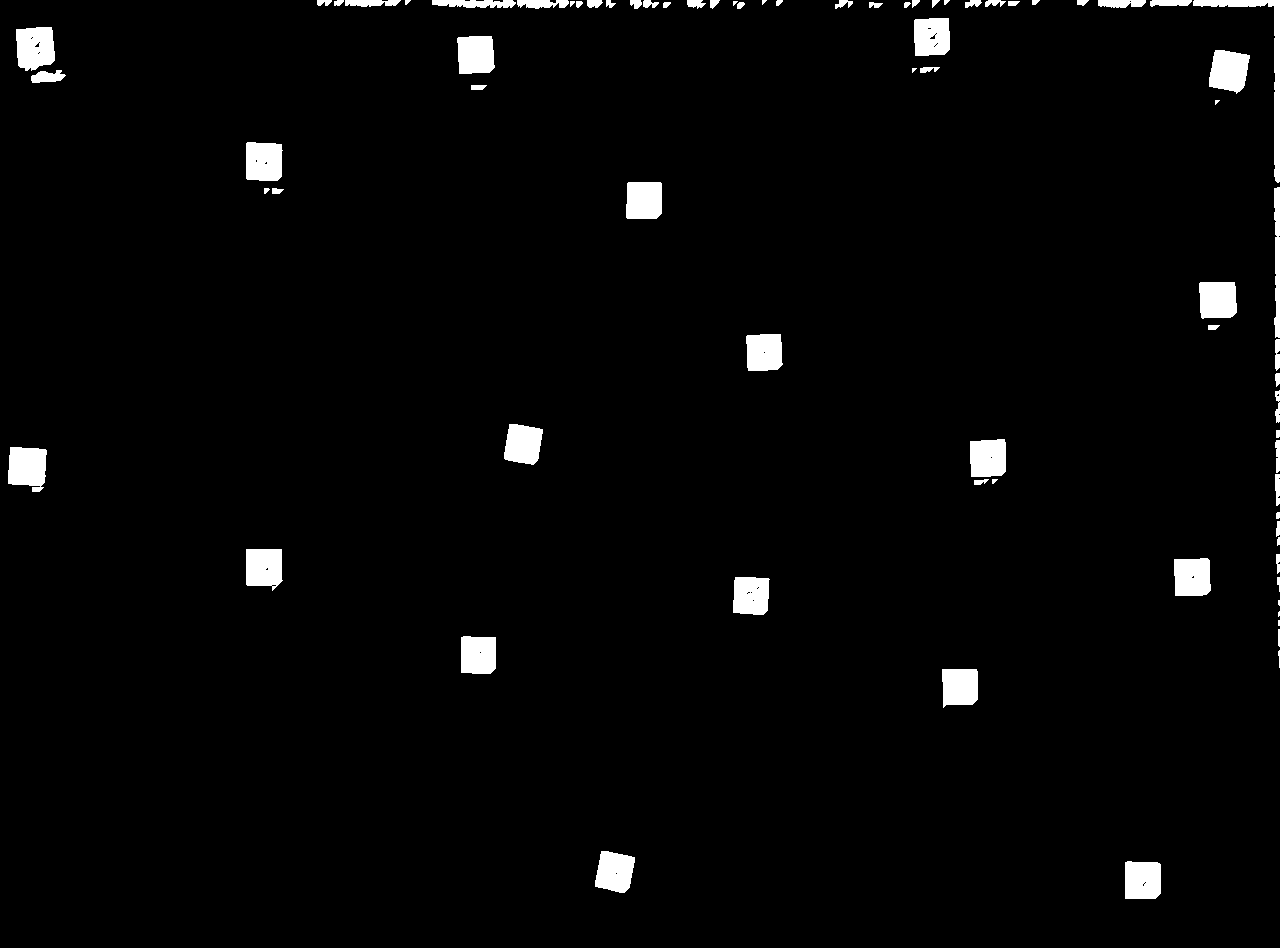

In [ ]:
image = cv2.imread('/content/Imagen.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar dilatación
thresh = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
gray = cv2.dilate(thresh,kernel,iterations = 4)

cv2_imshow(gray)


In [ ]:
def obtener_contornos(image_original, gray, inf, sup):
  drawing3 = None
  # Buscar los contornos
  contornos = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL,
	  cv2.CHAIN_APPROX_SIMPLE)
  contornos = imutils.grab_contours(contornos)
  cont_cromo = []

  # Seleccionar los contornos con restricciones de ancho y alto
  for c in contornos:
    # Calccular el bounding box 
    (x, y, w, h) = cv2.boundingRect(c)
    # Seleccionar con restricciones de ancho y alto
    if (w >= inf and w <= sup) and (h >= inf and h <= sup):
      cont_cromo.append(c)

  # Calcular el bounding box rectangular de cada contorno  
  boundRect = [None]*len(cont_cromo)
  contours_poly = [None]*len(cont_cromo)
  for i, c in enumerate(cont_cromo):
    contours_poly[i] = cv2.approxPolyDP(c, 3, True)
    boundRect[i] = cv2.boundingRect(contours_poly[i])

  # Graficar los bounding box
  color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
  copia = image_original.copy()
  for i in range(len(cont_cromo)):
    drawing3 = cv2.rectangle(copia, (int(boundRect[i][0]), int(boundRect[i][1])), \
              (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)
    
  boxes = []
  crop_images = []
  # Contenido de cada uno de los bounding box: 
  # coordenada de inicio en x, coordenada de inicio en y, ancho del bounding box 
  # y alto del bounding box
  for i in range(len(cont_cromo)):
    xc, yc, wc, hc = boundRect[i][0], boundRect[i][1], boundRect[i][2], boundRect[i][3]
    boxes.append((xc, yc, wc, hc))
    crop_images.append(image_original[yc:yc+hc,xc:xc+wc])
    #print(boundRect[i][0], boundRect[i][1], boundRect[i][2], boundRect[i][3])

  cv2_imshow(drawing3)
  return boxes, crop_images

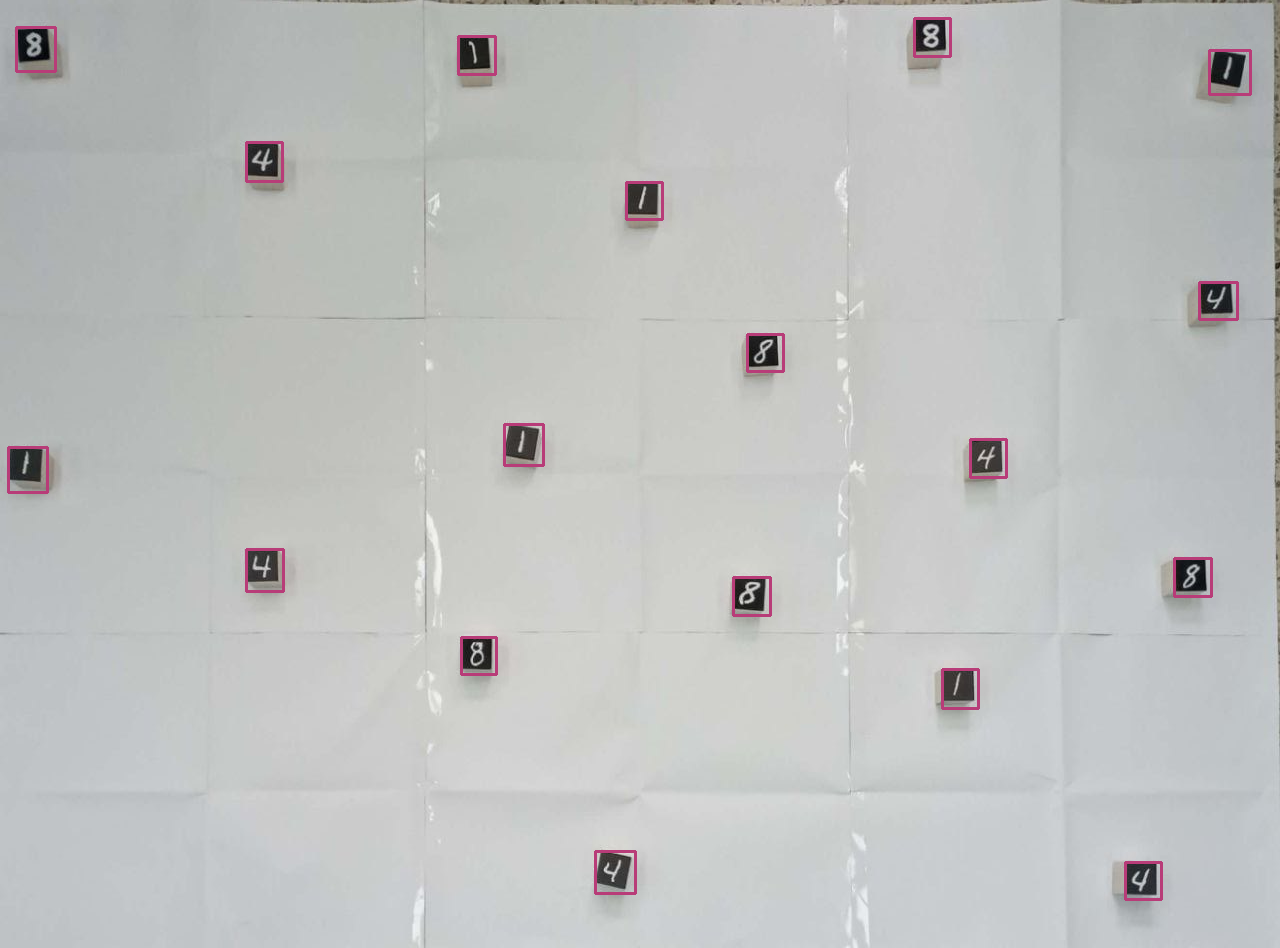

In [ ]:
boxes, crop_images = obtener_contornos(image, gray, 20, 50)

In [ ]:
boxes

[(1125, 862, 36, 37),
 (595, 851, 40, 42),
 (942, 669, 36, 39),
 (461, 637, 35, 37),
 (733, 577, 37, 38),
 (1174, 558, 37, 38),
 (246, 549, 37, 42),
 (8, 447, 39, 45),
 (970, 439, 36, 38),
 (504, 424, 39, 41),
 (747, 334, 36, 37),
 (1199, 282, 38, 37),
 (626, 182, 36, 37),
 (246, 142, 36, 39),
 (1209, 50, 41, 44),
 (458, 36, 37, 38),
 (16, 27, 39, 44),
 (914, 18, 36, 38)]

In [ ]:
import numpy as np
import pandas as pd

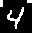

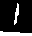

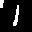

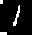

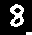

In [ ]:
cut_images_list = []
for img in crop_images:
  w, h = img.shape[0], img.shape[1]
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Aplicar dilatación
  thresh = cv2.threshold(gray, 127, 255,
	  cv2.THRESH_BINARY)[1]
  under, upper = 0.1, 0.8
  cut_image = thresh[int(w*under):int(w*upper),int(h*under):int(h*upper)]
  cut_image = cv2.copyMakeBorder(cut_image, 2, 2, 2, 2, cv2.BORDER_REPLICATE, None, value = 0)
  #under, upper = 5, 5
  #cut_image = img[under:w-under,upper:h-upper]
  cut_images_list.append(cut_image)
  #cut_image = cv2.Canny(cut_image,0,200)
  cv2_imshow(cut_image)

In [ ]:
reconstructed_model = keras.models.load_model("/content/MNIST_Modelo.h5")

4


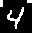

4


1


8


8


8


4


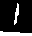

1


4


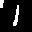

1


8


4


1


4


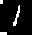

1


8


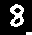

8


8


In [ ]:
numeros = {'4':[], '8':[], '1':[], '-1':[]}
i = 0
for img in cut_images_list:
  cv2_imshow(img)
  img = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_AREA)
  cv2_imshow(img)
  #gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
  img = img.reshape(-1,28,28,1)
  prediction = reconstructed_model.predict(img).argmax()
  #(xc, yc, wc, hc)
  x_info = (2*boxes[i][0]+boxes[i][2])/2
  y_info = (2*boxes[i][1]+boxes[i][3])/2
  print(prediction)
  if prediction in [1,4,8]:
    numeros['{0}'.format(prediction)] += [(x_info, y_info)]
  else:
    numeros['-1'] += [(x_info, y_info)]
  i += 1

In [ ]:
max = 0
for item in numeros.keys():
  lon = len(numeros[item])
  if lon >0:
    print(pd.DataFrame(numeros[item], columns = ['pos x', 'pos y']))
    if lon > max and lon <=6:
      max = len(numeros[item])
      cubo = item
      best = pd.DataFrame(numeros[item], columns = ['pos x', 'pos y'])

    pos x  pos y
0  1143.0  880.5
1   615.0  872.0
2   264.5  570.0
3   988.0  458.0
4  1218.0  300.5
5   264.0  161.5
    pos x  pos y
0   478.5  655.5
1   751.5  596.0
2  1192.5  577.0
3   765.0  352.5
4   476.5   55.0
5    35.5   49.0
6   932.0   37.0
    pos x  pos y
0   960.0  688.5
1    27.5  469.5
2   523.5  444.5
3   644.0  200.5
4  1229.5   72.0


In [ ]:
print("Detectados con exito:", max)
print("Datos:")
print(best)
print("Pertenecen al cubo:", cubo)

Detectados con exito: 6
Datos:
    pos x  pos y
0  1143.0  880.5
1   615.0  872.0
2   264.5  570.0
3   988.0  458.0
4  1218.0  300.5
5   264.0  161.5
Pertenecen al cubo: 4


In [ ]:
best.to_csv('/content/best.csv')